In [ ]:
!pip install -q jupyterthemes
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
import numpy as np
from statistics import NormalDist
from jupyterthemes import jtplot
from scipy.integrate import simpson
from numpy import trapz
jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = True)

In [ ]:
df = pd.read_csv("/content/ratings.csv")
df

,Const,Your Rating,Date Rated,Title,URL,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors
0,tt10016180,6,2024-01-28,The Little Things,https://www.imdb.com/title/tt10016180/,movie,6.3,128,2021,"Crime, Drama, Mystery, Thriller",122240,2021-01-28,John Lee Hancock
1,tt0102059,7,2024-02-02,Hot Shots!,https://www.imdb.com/title/tt0102059/,movie,6.7,85,1991,"Action, Comedy",115642,1991-07-26,Jim Abrahams
2,tt1024648,8,2023-12-20,Argo,https://www.imdb.com/title/tt1024648/,movie,7.7,120,2012,"Biography, Drama, Thriller",635992,2012-08-31,Ben Affleck
3,tt10272386,9,2023-12-09,The Father,https://www.imdb.com/title/tt10272386/,movie,8.2,97,2020,"Drama, Mystery",188045,2020-01-27,Florian Zeller
4,tt10288566,7,2023-12-09,Druk,https://www.imdb.com/title/tt10288566/,movie,7.7,117,2020,Drama,190865,2020-09-12,Thomas Vinterberg
...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,tt9770150,9,2023-12-20,Nomadland,https://www.imdb.com/title/tt9770150/,movie,7.3,107,2020,Drama,180394,2020-09-11,Chloé Zhao
313,tt0988045,7,2024-01-21,Sherlock Holmes,https://www.imdb.com/title/tt0988045/,movie,7.6,128,2009,"Action, Adventure, Mystery",665772,2009-12-14,Guy Ritchie
314,tt0993846,9,2023-12-09,The Wolf of Wall Street,https://www.imdb.com/title/tt0993846/,movie,8.2,180,2013,"Biography, Comedy, Crime, Drama",1559859,2013-12-09,Martin Scorsese
315,tt0099674,7,2023-12-17,The Godfather Part III,https://www.imdb.com/title/tt0099674/,movie,7.6,162,1990,"Crime, Drama",420918,1990-12-20,Francis Ford Coppola


In [ ]:
filter_1 = df['Title Type'] != 'movie'
df.drop(df[filter_1].index, inplace = True)
df

,Const,Your Rating,Date Rated,Title,URL,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors
0,tt10016180,6,2024-01-28,The Little Things,https://www.imdb.com/title/tt10016180/,movie,6.3,128,2021,"Crime, Drama, Mystery, Thriller",122240,2021-01-28,John Lee Hancock
1,tt0102059,7,2024-02-02,Hot Shots!,https://www.imdb.com/title/tt0102059/,movie,6.7,85,1991,"Action, Comedy",115642,1991-07-26,Jim Abrahams
2,tt1024648,8,2023-12-20,Argo,https://www.imdb.com/title/tt1024648/,movie,7.7,120,2012,"Biography, Drama, Thriller",635992,2012-08-31,Ben Affleck
3,tt10272386,9,2023-12-09,The Father,https://www.imdb.com/title/tt10272386/,movie,8.2,97,2020,"Drama, Mystery",188045,2020-01-27,Florian Zeller
4,tt10288566,7,2023-12-09,Druk,https://www.imdb.com/title/tt10288566/,movie,7.7,117,2020,Drama,190865,2020-09-12,Thomas Vinterberg
...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,tt9770150,9,2023-12-20,Nomadland,https://www.imdb.com/title/tt9770150/,movie,7.3,107,2020,Drama,180394,2020-09-11,Chloé Zhao
313,tt0988045,7,2024-01-21,Sherlock Holmes,https://www.imdb.com/title/tt0988045/,movie,7.6,128,2009,"Action, Adventure, Mystery",665772,2009-12-14,Guy Ritchie
314,tt0993846,9,2023-12-09,The Wolf of Wall Street,https://www.imdb.com/title/tt0993846/,movie,8.2,180,2013,"Biography, Comedy, Crime, Drama",1559859,2013-12-09,Martin Scorsese
315,tt0099674,7,2023-12-17,The Godfather Part III,https://www.imdb.com/title/tt0099674/,movie,7.6,162,1990,"Crime, Drama",420918,1990-12-20,Francis Ford Coppola


Text(0.5, 1.0, 'IMDb Rating')

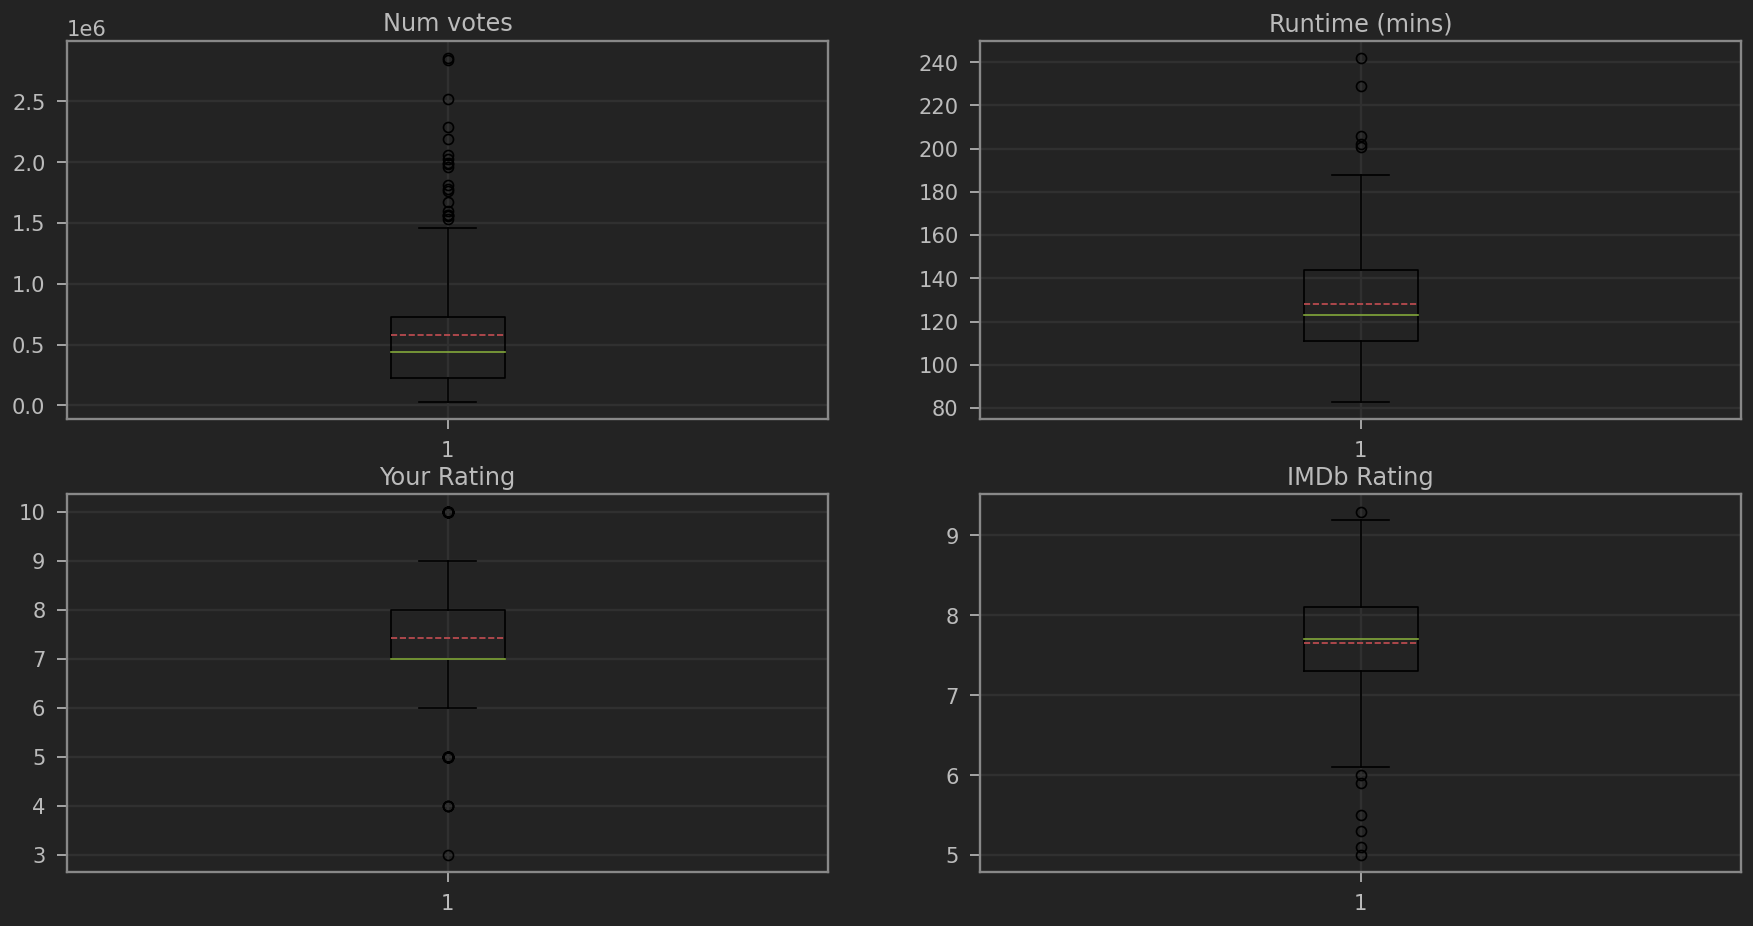

In [ ]:
fig, ax = plt.subplots(2, 2, dpi = 120, figsize = (18,9))

ax[0, 0].boxplot(df['Num Votes'], showmeans = True, meanline = True)
ax[0, 0].set_title('Num votes')

ax[0, 1].boxplot(df['Runtime (mins)'], showmeans = True, meanline = True)
ax[0, 1].set_title('Runtime (mins)')

ax[1, 0].boxplot(df['Your Rating'], showmeans = True, meanline = True)
ax[1, 0].set_title('Your Rating')

ax[1, 1].boxplot(df['IMDb Rating'], showmeans = True, meanline = True)
ax[1, 1].set_title('IMDb Rating')

In [ ]:
features = ['Num Votes', 'Runtime (mins)','Your Rating', 'IMDb Rating' ]
median_boxplots =[]
mean_boxplots =[]
trim_mean = []
for f in features:
  median_boxplots.append(df[f].median())
  mean_boxplots.append(df[f].mean())
  trim_mean.append(stats.trim_mean(df[f], 0.1))
df_boxplots = pd.DataFrame( data = [median_boxplots, mean_boxplots, trim_mean], index = ['Median', 'Mean', 'Trim mean'], columns = features)
round(df_boxplots, 2)

,Num Votes,Runtime (mins),Your Rating,IMDb Rating
Median,439987.00,123.00,7.00,7.70
Mean,575827.25,128.16,7.43,7.65
Trim mean,493270.03,126.20,7.46,7.69


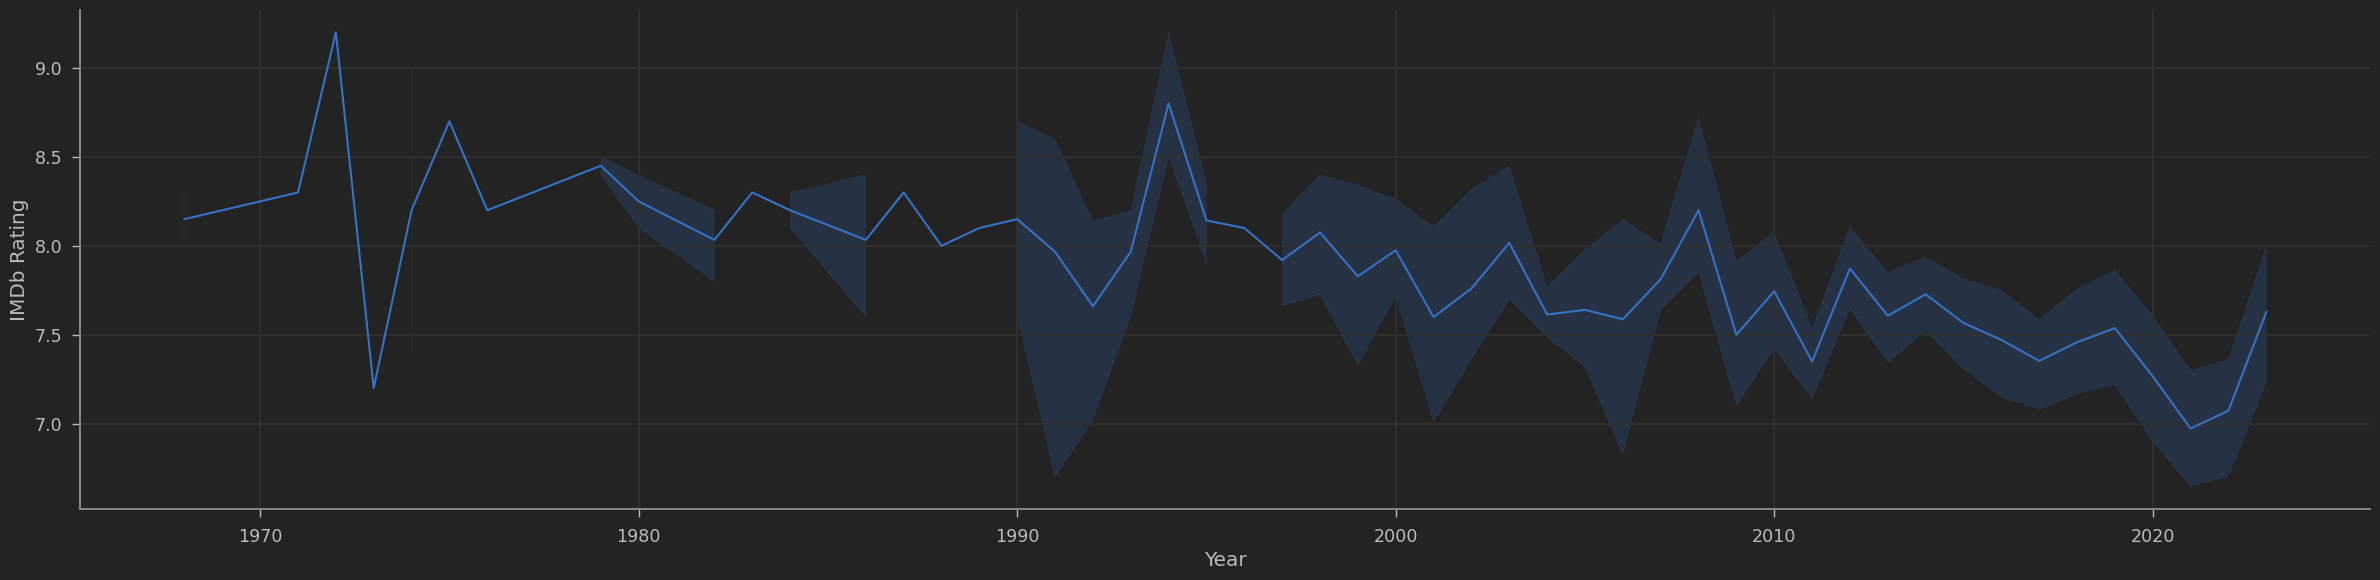

In [ ]:
sns.relplot(x='Year', y='IMDb Rating', kind = 'line', data=df, height=6, aspect=4)


In [ ]:
df_= df.drop(columns = ['Const', 'Date Rated', 'Title Type', 'URL'])
df_corr = df_.corr(numeric_only = 'False')
print('Correlation Dataframe:\n')
df_corr.style.background_gradient(cmap='coolwarm').format(precision = 2)

Correlation Dataframe:



,Your Rating,IMDb Rating,Runtime (mins),Year,Num Votes
Your Rating,1.00,0.58,0.24,-0.35,0.34
IMDb Rating,0.58,1.00,0.40,-0.43,0.70
Runtime (mins),0.24,0.40,1.00,-0.08,0.34
Year,-0.35,-0.43,-0.08,1.00,-0.28
Num Votes,0.34,0.70,0.34,-0.28,1.00


In [ ]:
df_r2 = df_corr.apply(np.square, axis=0)
print('\nR^2 Dataframe:\n')
df_r2.style.background_gradient(cmap='coolwarm').format(precision = 2)


R^2 Dataframe:



,Your Rating,IMDb Rating,Runtime (mins),Year,Num Votes
Your Rating,1.00,0.33,0.06,0.12,0.12
IMDb Rating,0.33,1.00,0.16,0.18,0.49
Runtime (mins),0.06,0.16,1.00,0.01,0.11
Year,0.12,0.18,0.01,1.00,0.08
Num Votes,0.12,0.49,0.11,0.08,1.00


Text(0.5, 1.0, 'Num Votes x Your Rating')

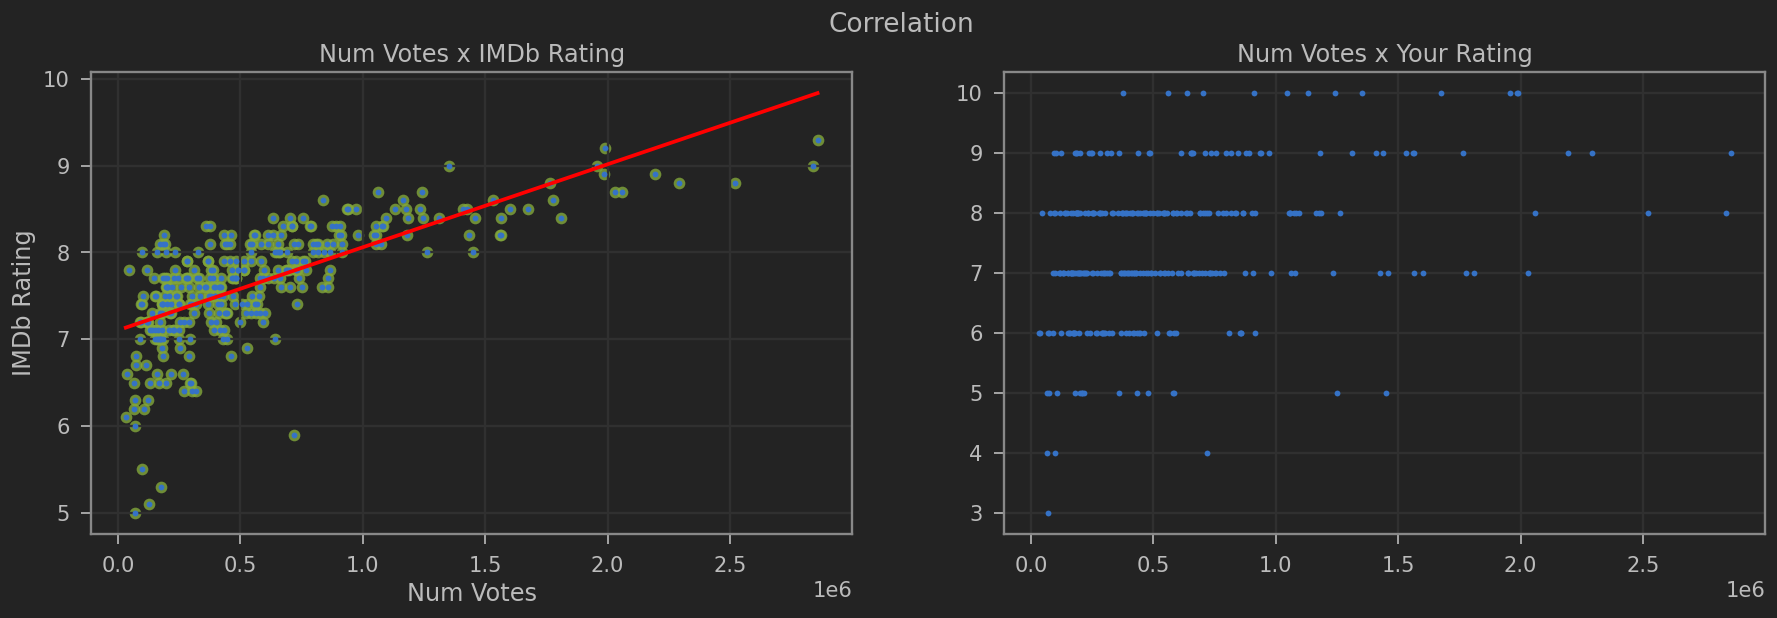

In [ ]:
fig, ax = plt.subplots(1,2, dpi = 120, figsize = (18,5))
fig.suptitle('Correlation')

ax[0].plot(df_['Num Votes'],df_['IMDb Rating'], '.')
ax[0].set_title("Num Votes x IMDb Rating")
sns.regplot(x=df_['Num Votes'], y=df_['IMDb Rating'], ci=False, line_kws={'color':'red'}, ax=ax[0]);

ax[1].plot(df_['Num Votes'],df_['Your Rating'], '.')
ax[1].set_title("Num Votes x Your Rating")

In [ ]:
df2 = df.drop(columns = ['Const', 'Date Rated', 'Title', 'URL', 'Title Type', 'Year', 'Genres', 'Release Date'])
df2

,Your Rating,IMDb Rating,Runtime (mins),Num Votes,Directors
0,6,6.3,128,122240,John Lee Hancock
1,7,6.7,85,115642,Jim Abrahams
2,8,7.7,120,635992,Ben Affleck
3,9,8.2,97,188045,Florian Zeller
4,7,7.7,117,190865,Thomas Vinterberg
...,...,...,...,...,...
312,9,7.3,107,180394,Chloé Zhao
313,7,7.6,128,665772,Guy Ritchie
314,9,8.2,180,1559859,Martin Scorsese
315,7,7.6,162,420918,Francis Ford Coppola


In [ ]:
df3 = df2.groupby(by = 'Directors').mean()
df3

,Your Rating,IMDb Rating,Runtime (mins),Num Votes
Directors,,,,
Aaron Sorkin,8.0,7.40,140.0,185614.0
Alejandro Amenábar,7.0,7.60,101.0,390279.0
Alejandro G. Iñárritu,8.5,7.85,137.5,763363.5
Alex Garland,8.0,7.70,108.0,580642.0
Alfonso Cuarón,6.0,7.70,91.0,858237.0
...,...,...,...,...
Wolfgang Petersen,6.0,7.30,163.0,565408.0
Woody Allen,7.0,7.30,98.0,211650.0
Yorgos Lanthimos,8.0,7.00,121.0,182351.0


In [ ]:
df3['delta'] = df3['Your Rating']-df3['IMDb Rating']
directors = df3.index.tolist()
n_directors = []
for d in directors:
  count = (df2['Directors'].value_counts()[d])
  n_directors.append(count)
df3.insert(0, "# Filmes", n_directors)
df3 = df3.reindex(columns=['# Filmes', 'Your Rating', 'IMDb Rating', 'delta', 'Runtime (mins)', 'Num Votes'])
df3.round(2)

,# Filmes,Your Rating,IMDb Rating,delta,Runtime (mins),Num Votes
Directors,,,,,,
Aaron Sorkin,1,8.0,7.40,0.60,140.0,185614.0
Alejandro Amenábar,1,7.0,7.60,-0.60,101.0,390279.0
Alejandro G. Iñárritu,2,8.5,7.85,0.65,137.5,763363.5
Alex Garland,1,8.0,7.70,0.30,108.0,580642.0
Alfonso Cuarón,1,6.0,7.70,-1.70,91.0,858237.0
...,...,...,...,...,...,...
Wolfgang Petersen,1,6.0,7.30,-1.30,163.0,565408.0
Woody Allen,1,7.0,7.30,-0.30,98.0,211650.0
Yorgos Lanthimos,1,8.0,7.00,1.00,121.0,182351.0


count    186.00
mean     122.62
std       21.81
min       83.00
25%      107.00
50%      120.00
75%      135.75
max      229.00
Name: Runtime (mins), dtype: float64
-0.5786336542870245


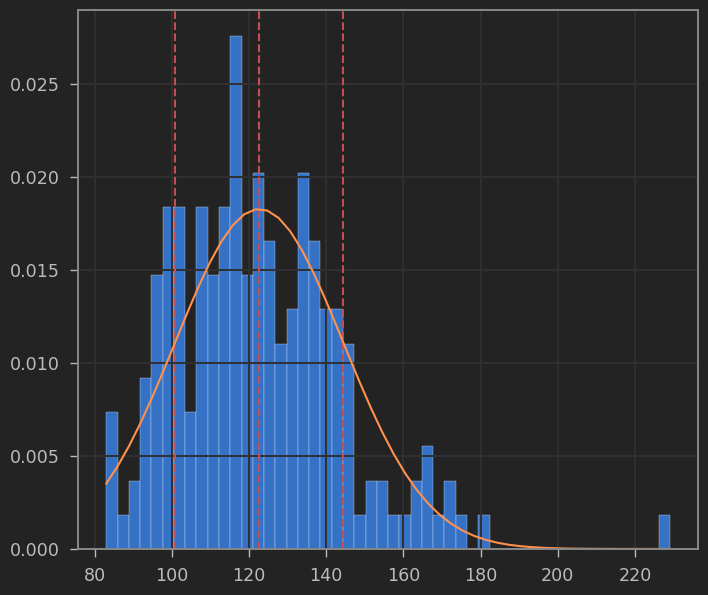

In [ ]:
df3_d=df3['Runtime (mins)'].describe().round(2)
print(df3_d)
mean1 = df3_d.iloc[1]
std1 = df3_d.iloc[2]
print(NormalDist(mu=mean1, sigma=std1).zscore(110))
domain = np.linspace(df3['Runtime (mins)'].min(), df3['Runtime (mins)'].max())
plt.hist(df3['Runtime (mins)'], bins = 50, edgecolor = 'w', color = 'b', density = 'true')
plt.axvline(mean1, color = 'r', linestyle = 'dashed')
plt.axvline(mean1-std1, color = 'r', linestyle = 'dashed')
plt.axvline(mean1+std1, color = 'r', linestyle = 'dashed')
plt.plot(domain, norm.pdf(domain, mean1,std1), color = 'y')


In [ ]:
df3.corr()

,# Filmes,Your Rating,IMDb Rating,delta,Runtime (mins),Num Votes
# Filmes,1.000000,0.120707,0.138987,0.052398,0.250082,0.246578
Your Rating,0.120707,1.000000,0.567851,0.829780,0.145610,0.265126
IMDb Rating,0.138987,0.567851,1.000000,0.011809,0.420228,0.653509
delta,0.052398,0.829780,0.011809,1.000000,-0.108034,-0.121013
Runtime (mins),0.250082,0.145610,0.420228,-0.108034,1.000000,0.315315
Num Votes,0.246578,0.265126,0.653509,-0.121013,0.315315,1.000000


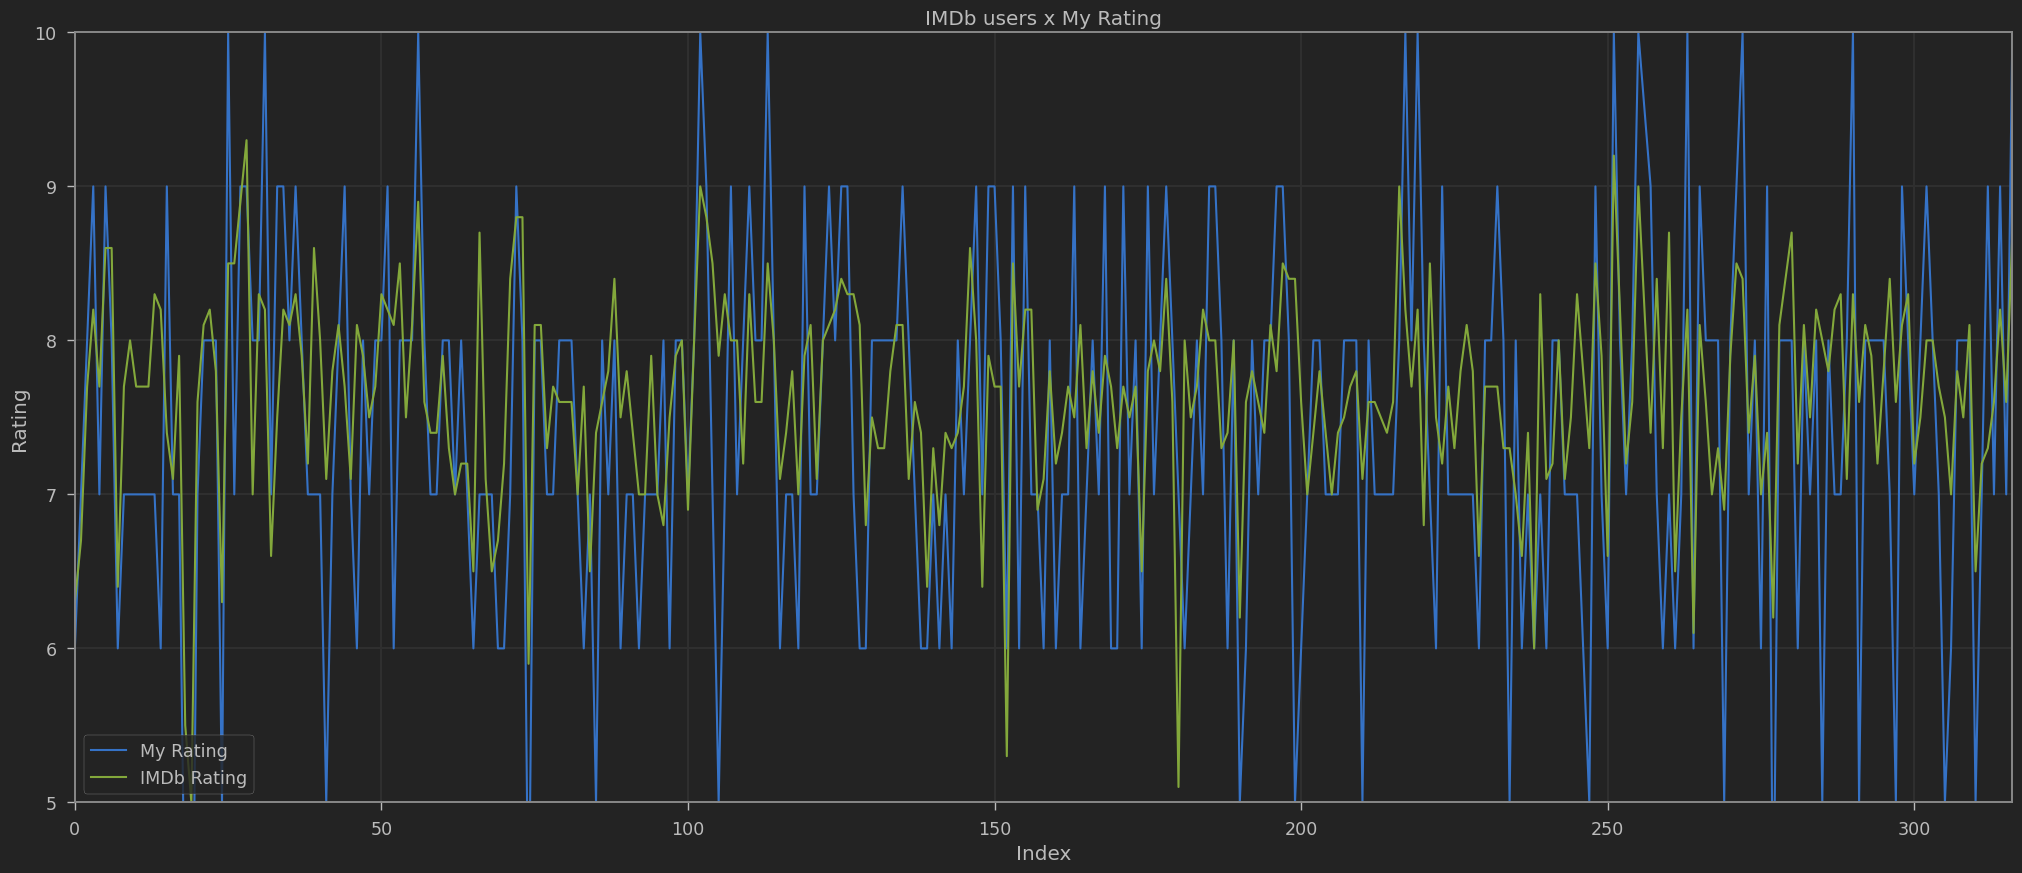

In [ ]:
plt.figure(figsize = (25,10))
plt.title("IMDb users x My Rating")
plt.xlabel("Index")
plt.xlim(left=0, right=len(df.index)+1)
plt.ylabel("Rating")
plt.ylim(top = 10, bottom= 5)
plt.legend(["blue"])

plot1, = plt.plot(df2.index, df2['Your Rating'])
plot2, = plt.plot(df2.index, df2['IMDb Rating'])
plt.legend([plot1,plot2],["My Rating", "IMDb Rating"], loc='lower left')
#plt.fill_between(df2.index, df2['Your Rating'])
#plt.fill_between(df2.index, df2['IMDb Rating'], color = 'g')


In [ ]:
area_imdb = trapz(df2.index, df2['IMDb Rating'])
area_my_rating = trapz(df2.index, df2['Your Rating'])
print('Area IMDb =', area_imdb)
print('Area My Rating =', area_my_rating)


Area IMDb = 330.2999999999996
Area My Rating = 809.5


In [ ]:
df4 = df.groupby(by = 'Year').mean()
df4.round(2)

<ipython-input-252-40424217189a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df4 = df.groupby(by = 'Year').mean()


,Your Rating,IMDb Rating,Runtime (mins),Num Votes
Year,,,,
1968,7.50,8.15,143.00,472700.00
1971,7.00,8.30,136.00,874492.00
1972,10.00,9.20,175.00,1991079.00
1973,7.00,7.20,112.00,118447.00
1974,9.50,8.20,142.50,766341.00
1975,7.00,8.70,133.00,1063194.00
1976,10.00,8.20,114.00,909823.00
1979,9.50,8.45,132.00,821978.00
1980,8.00,8.25,137.50,736020.50


Text(0.5, 1.0, 'My Rating')

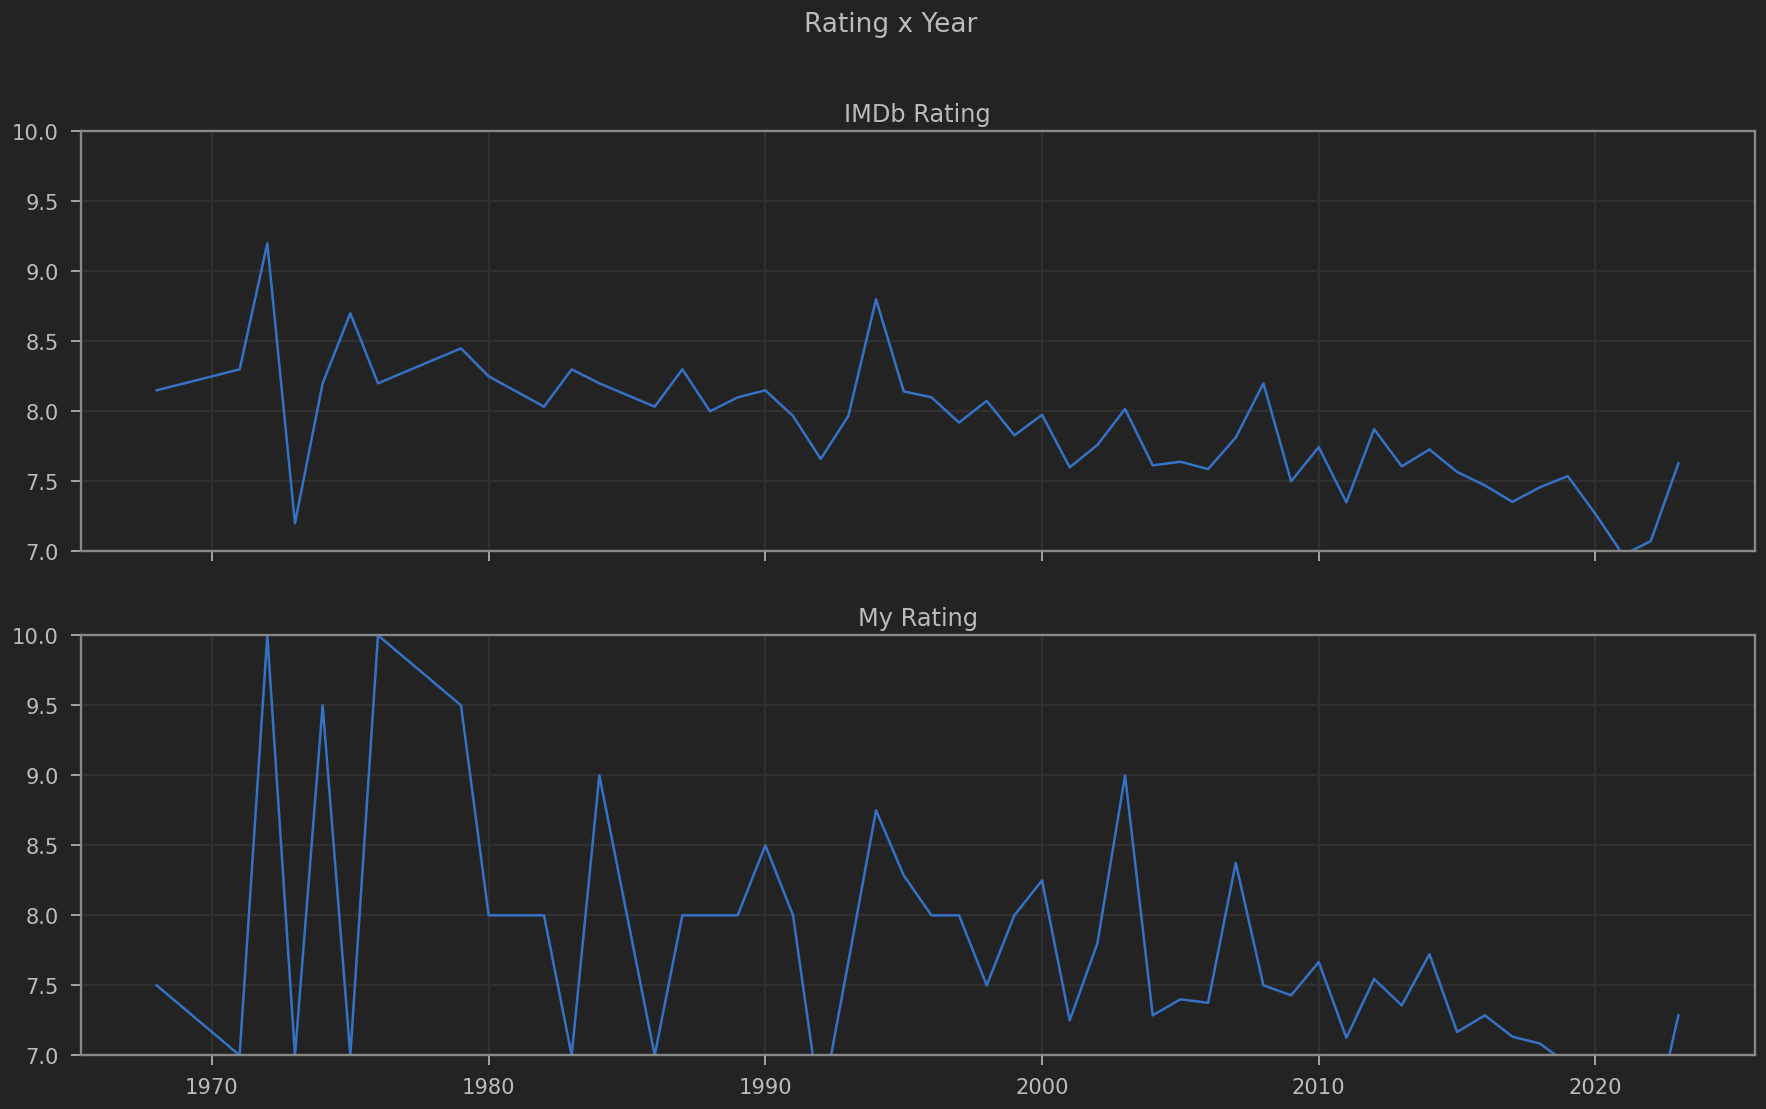

In [ ]:
x1 = df4.index
y1 = df4['IMDb Rating']

fig, ax = plt.subplots(2, dpi = 120, figsize = (18,10), sharex=True)
fig.suptitle('Rating x Year')

ax[0].plot(x1,y1)
ax[0].set_title("IMDb Rating")
ax[0].set_ylim(top = 10, bottom = 7)

y2 = df4['Your Rating']
ax[1].plot(x1,y2)
ax[1].set_ylim(top = 10, bottom = 7)
ax[1].set_title("My Rating")